# Signal Consistency

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from   tqdm import tqdm

import matplotlib.pyplot as plt
from   matplotlib.ticker import FuncFormatter

In [2]:
sys.path.append(r"C:\Users\Diego\Desktop\app_prod\research\FallenAngel\root\src")
from SignalConsistancy import SignalConsistancy

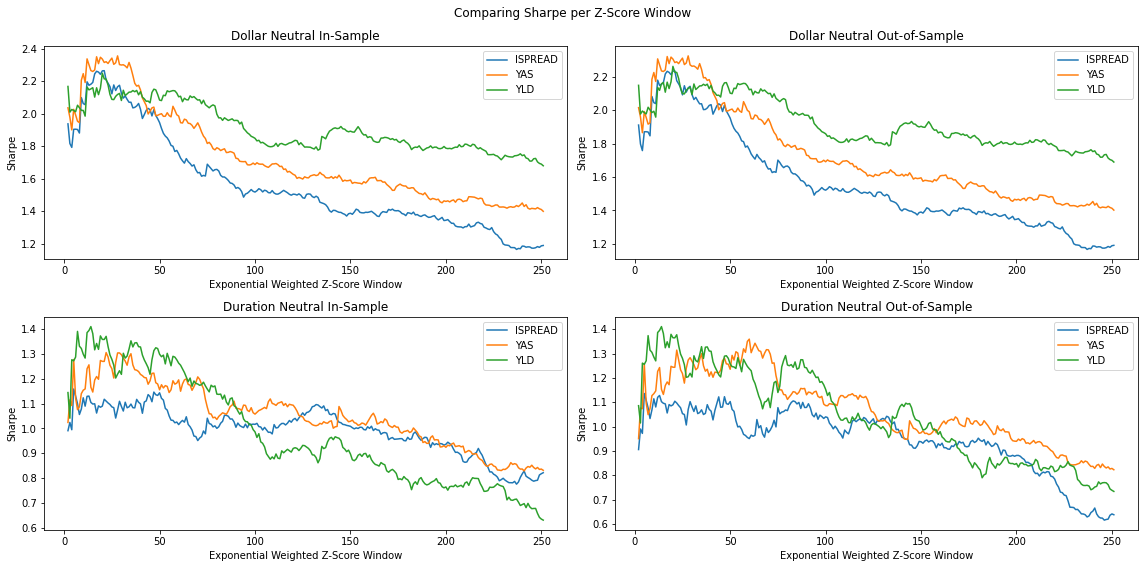

In [3]:
def plot_zscore_window() -> plt.Figure: 
    
    df_longer = (SignalConsistancy().get_sharpe().rename(
        columns = {"variable": "yld_var"}).
        melt(id_vars = ["yld_var", "rtn_group", "window"]).
        assign(
            rtn_group = lambda x: x.rtn_group.str.split("_").str[0].str.capitalize() + " Neutral",
            variable  = lambda x: np.where(x.variable == "oos_sharpe", "Out-of-Sample", "In-Sample"),
            group_var = lambda x: x.rtn_group + " " + x.variable))

    group_vars = df_longer.group_var.drop_duplicates().sort_values().to_list()
    fig, axes  = plt.subplots(ncols = len(group_vars) // 2, nrows = len(group_vars) // 2, figsize = (16,8))

    for group_var, ax in zip(group_vars, axes.flatten()):

        (df_longer.query(
            "group_var == @group_var").
            rename(columns = {"yld_var": ""}).
            pivot(index = "window", columns = "", values = "value").
            plot(
                ax     = ax,
                ylabel = "Sharpe",
                xlabel = "Exponential Weighted Z-Score Window",
                title  = group_var))

    fig.suptitle("Comparing Sharpe per Z-Score Window")
    plt.tight_layout()
    
plot_zscore_window()